# Módulo II - mini projeto 2 - Visualização de Dados

O projeto pode ser feito em até 4 integrantes

Para a entrega, coloque o notebook respondido no seu github (um por grupo) ou, em último caso, salvar o notebook e enviar via chat do class.

Usando os dados do mini projeto 1 com algumas colunas acrescentadas

Arquivo: investidores.csv

Colunas extras:
- Reserva: Valor da reserva de emergência
- Invest_curto_prazo, Invest_longo_prazo, Invest_medio_prazo : investimento disponível a curto, médio e longo prazo
- Total: total já investido

Responda cada item graficamente. Você pode usar o matplotlib, gráfico do pandas, seaborn ou plotly.

O projeto contém 3 bônus, que são opcionais


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import plotly

In [59]:
## Carregar o arquivo investidores.csv

df= pd.read_csv("https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto2/investidores.csv")

In [60]:
df.head(2)

id                             Nome  Sexo  idade  \
0  id0000002  Sebastião Castelo Branco Júnior  Masc     33   
1  id0000003        Romildo Fábio de Carvalho  Masc     40   

                     Email                                    Job Estado  \
0   barnesandrea@yahoo.com                   Biochemist, clinical     DF   
1  walkermichael@yahoo.com  Development worker, international aid     DF   

      Renda       Perfil  Ativo01  ...  Ativo03   Ativo04  Ativo05  Ativo06  \
0     21.96     Moderado   842.12  ...  3336.07  14052.91  5624.22  2669.98   
1  62497.64  Conservador   818.81  ...  3396.64  14052.91  5033.83  2229.45   

   Ativo07     Total     Reserva  Invest_curto_prazo  Invest_medio_prazo  \
0   504.17  18622.65     22.6188              26.352              35.136   
1   523.12  17518.37  64372.5692          124995.280           99996.224   

   Invest_longo_prazo  
0              39.528  
1           99996.224  

[2 rows x 21 columns]

## 1) Faça um gráfico para ver a distribuição da idade dos investidores
dica: histograma

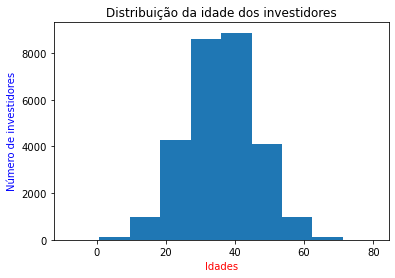

In [61]:
%matplotlib inline


x = df['idade']
plt.hist(x)
plt.title('Distribuição da idade dos investidores')
plt.ylabel('Número de investidores', color = 'blue')
plt.xlabel('Idades', color = 'red' )
plt.show()

## 2) Faça um gráfico de pizza para ver a distribuição dos perfis dos investidores
Coloque o valor das porcentagens e a legenda  
dica: usar value_counts() 

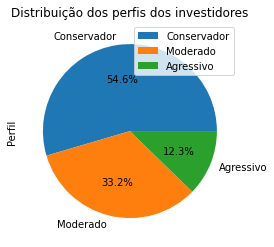

In [63]:
df['Perfil'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição dos perfis dos investidores')
plt.legend()
plt.show()

## 3) Faça um gráfico de barras verticais da quantidade de investidores por estado
dica: usar value_counts() ou groupby

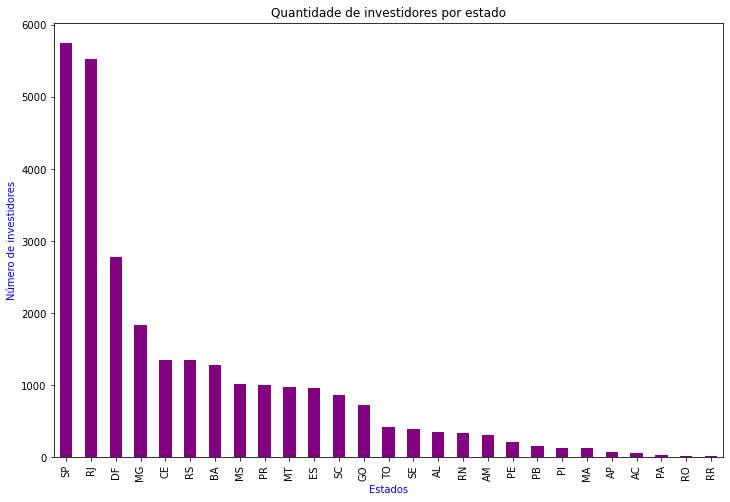

In [64]:
plt.figure(figsize=(12,8))
df['Estado'].value_counts().plot(kind='bar', color='purple')
plt.title('Quantidade de investidores por estado')
plt.ylabel('Número de investidores', color = 'blue')
plt.xlabel('Estados', color = 'blue')
plt.show()

## 4) Faça um gráfico de barras horizontais da soma dos ativos01 a ativos07
dica: pode usar df[['Ativo01','Ativo02','Ativo03','Ativo04','Ativo05','Ativo06','Ativo07']].sum()

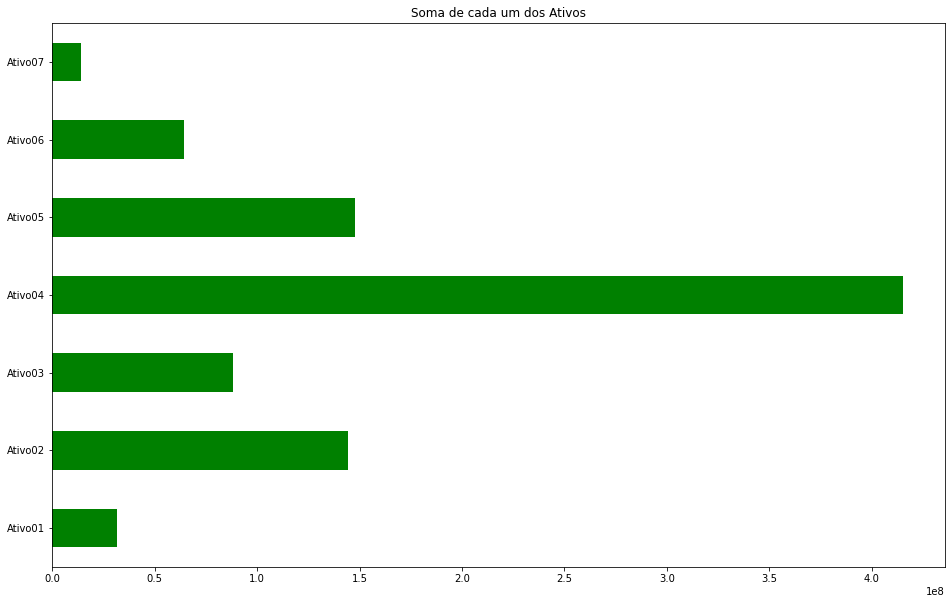

In [94]:

plt.figure(figsize=(16,10))
plt.title('Soma de cada um dos Ativos')
df[['Ativo01','Ativo02','Ativo03','Ativo04','Ativo05','Ativo06','Ativo07']].sum().plot(kind='barh', color='green')
plt.show()

## 5) Faça um gráfico para ver a distribuição dos valores do Ativo07 usando boxplot
Na mesma figura compare a distribuição do Ativo07 em cada estado


In [114]:

fig = px.box(df, x ='Estado', y='Ativo07', title = 'Distribuição do Ativo07 em cada Estado')
fig.update_traces(marker_color = 'green', marker_symbol='cross')

## 6) Faça um gráfico de dispersão dos Ativo04 e Ativo07
Na mesma figura use cores para identificar o perfil

In [103]:
px.scatter(df, x='Ativo04', y = 'Ativo07', color='Perfil', color_discrete_sequence=['blue', 'purple', 'yellow'])

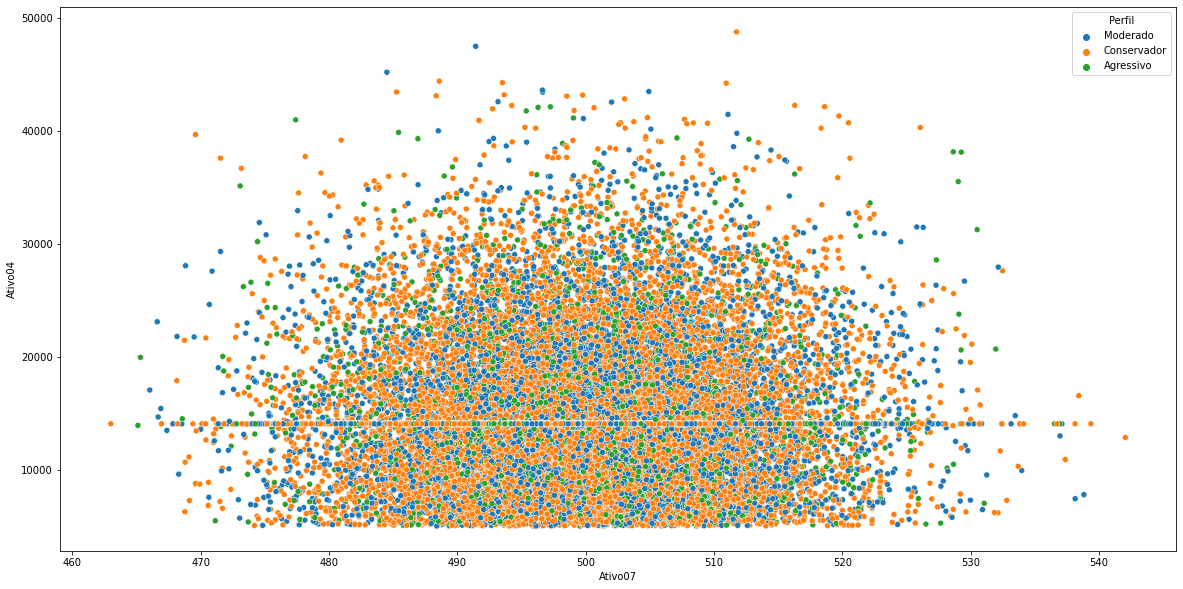

In [137]:
# mesmo gráfico usando seaborn
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x ='Ativo07', y= 'Ativo04', hue='Perfil')
plt.show()

## 7) Faça um mapa de calor com a correlação entre Renda, Reserva, Investimentos a curto, médio e longo prazo
Coloque argumentos de anotação e use o cmap = 'plasma'
dica: Use essa correlação - df[['Renda','Invest_curto_prazo','Invest_medio_prazo','Invest_longo_prazo', 'Reserva']].corr()

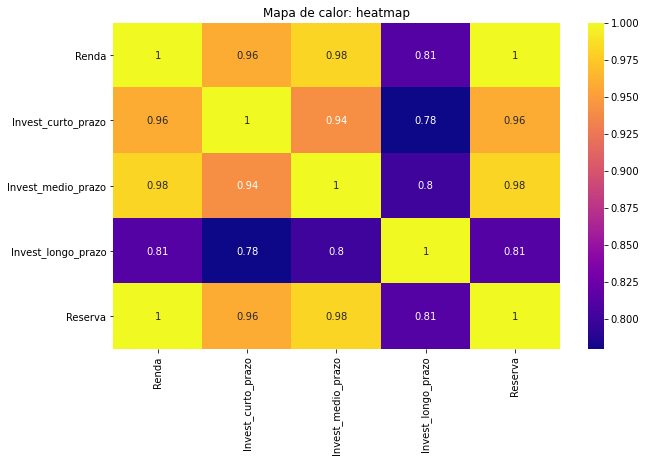

In [144]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df[['Renda','Invest_curto_prazo','Invest_medio_prazo','Invest_longo_prazo', 'Reserva']].corr(), annot=True, cmap='plasma')
plt.title('Mapa de calor: heatmap')
plt.show()

## 8) No gráfico de linhas abaixo, acrescente:
- Título: Total de investimento em cada ativo
- Mude o tamanho da figura
- Nome nos eixos
- Linha vermelha horizontal em 50000000
- Grade
- Rotacione os ticks do eixo x em 45º
- Mude os ticks do eixo y para azul
- Legenda no centro da figura

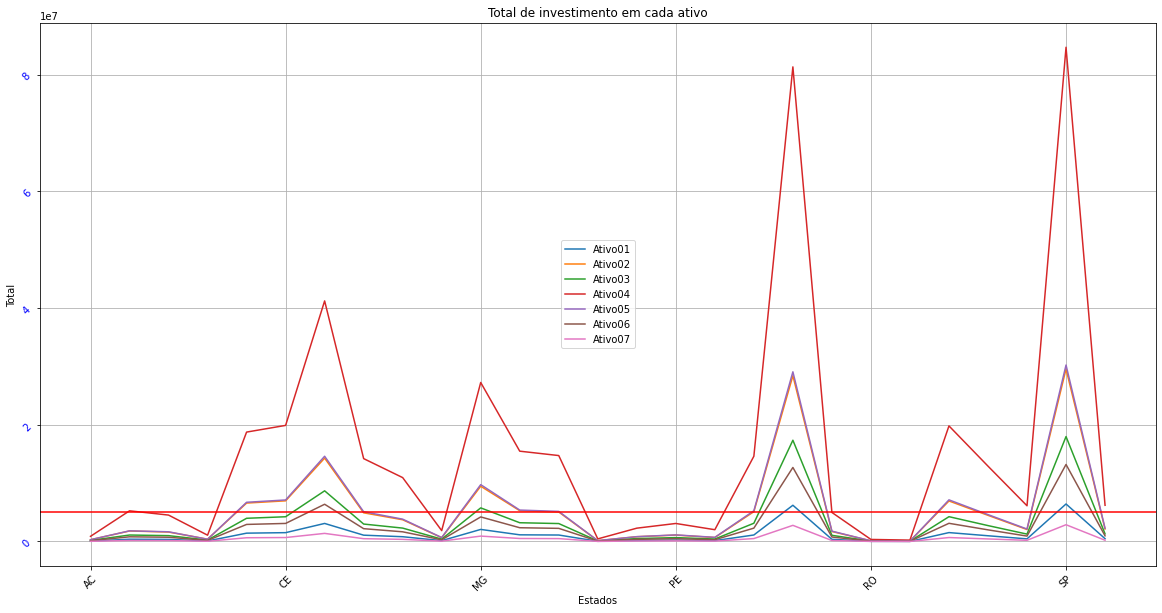

In [139]:

dados = df.groupby(['Estado'])[['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07']].sum()

# Coloquei título, nome nos eixos e grade no comando abaixo
dados.plot(title='Total de investimento em cada ativo', xlabel='Estados', ylabel='Total', grid=True )

# alterei o tamanho da figura
# tentei utilizar o plt.figure(figsize=(20,10)) antes do código "dados = df.groupby", porém não alterava o tamanho do gráfico
# pesquisando na internet achei este comando plt.gcf().set_size_inches(20, 10) e funcionou.
plt.gcf().set_size_inches(20, 10)

#Rotacão dos ticks e mudando a cor do tick y para azul
plt.xticks(rotation=45)
plt.yticks(rotation=45, color = 'blue')

#acrescentando linha vermelha horizontal em 5000000
plt.axhline(5000000, color='red')

#colocando a legenda no centro
plt.legend(loc='center')
plt.show()

# Bônus 1

Faça uma nuvem de palavras com a profissão dos investidores. Altere o tamanho, o fundo e personalize a figura

instalação:

`conda install -c conda-forge worcloud`

código:

`from wordcloud import WordCloud
import matplotlib.pyplot as plt`

`text=','.join(df['Job'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()`

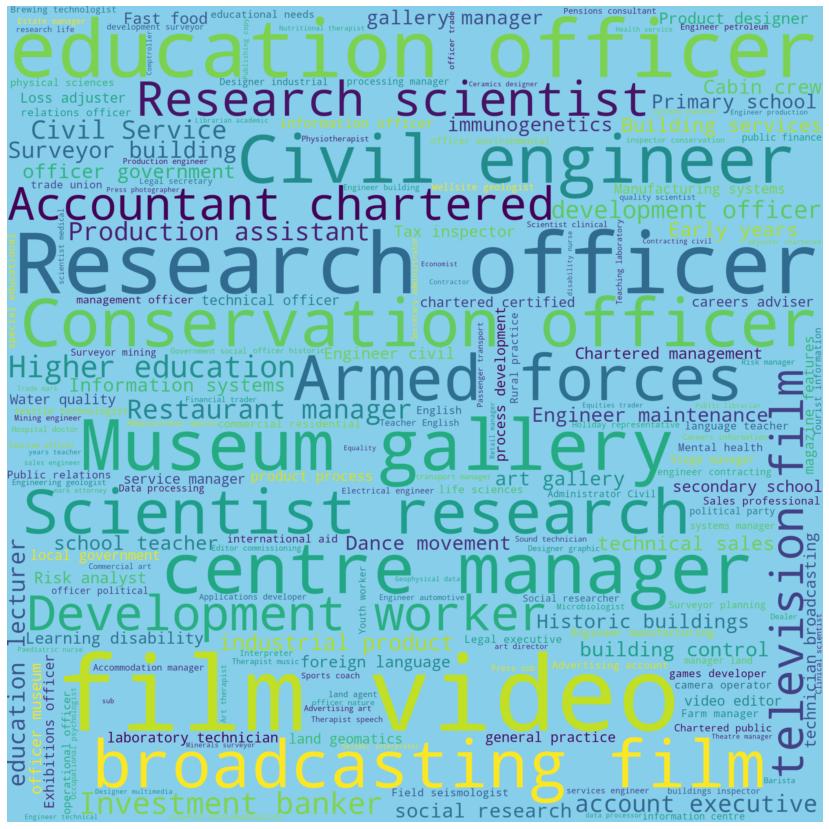

In [152]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ','.join(df['Job'])

wordcloud = WordCloud(width=2000, height=2000, margin=0, background_color="skyblue").generate(text)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

## Bônus 2

Usando técnica de machine learning chamada **kmeans**, divida os investidores em 5 grupos com relação ao que foi investido em cada ativo. Por exemplo, pessoas que tiveram investimentos parecidos em cada ativo, devem ficar no mesmo grupo. Para visualizar, use um gráfico de dispersão do ativo04 e ativo07 e acrescente os grupos usando cores.

O Kmeans é um algoritmo de machine learning não supervisionado que agrupa (cluster) de acordo com suas características


Podemos resumir o algoritmo nos seguintes passos:


- Step 1: Escolha o número de grupos (clusters) k 

- Step 2: Selecione k pontos aleatoriamente (chamados de centroides)

- step 3: Atribuir todos os pontos ao centróide do cluster mais próximo
Selecione um ponto e calcule a distância desse ponto a cada centróide. Ele fará parte do cluster com o centróide mais próximo. Faça isso com todos os pontos

- step 4: Recalcule o centróide com o grupo desses pontos

- Step 5: Repita o steps 3 e 4 até que nenhum ponto saia do grupo (cluster)


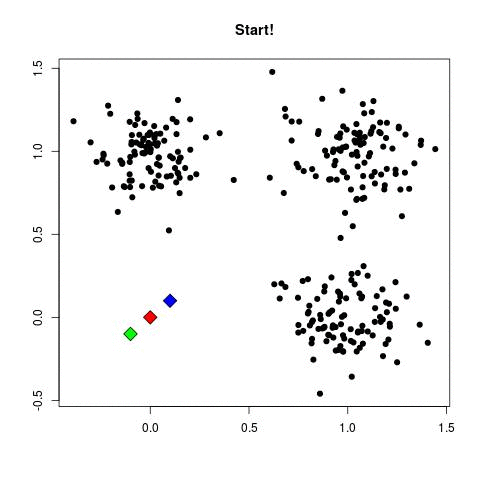

instalação  
`conda install -c conda-forge scikit-learn`

In [ ]:
from sklearn.cluster import KMeans

X = df[['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

df['cluster'] = kmeans.labels_

sns.scatterplot(data=df, x='Ativo04', y='Ativo07', hue='cluster')

## Bônus 3
Com os dados BVSP que usamos nas aulas (https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Aula05/BVSP2.csv) , faça um gráfico candlestick dos últimos dias

`conda install -c conda-forge mplfinance`

Fonte para pesquisa:
https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh

In [ ]:
import mplfinance as mpf

ibov = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Aula05/BVSP2.csv')

ibov['Date'] = pd.to_datetime(ibov['Date']) # transformando em datetime
ibov = ibov.set_index('Date') # Formato DatetimeIndex, a data tem que estar no index
mpf.plot(ibov[-30:], type='candle', style='yahoo', volume=True) # ibov[-30:] usando os últimos 30 registros